In [1]:
#load the required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline 

In [3]:
#read the csv file using pandas. customer_data will refer to this.
customer_data = pd.read_csv('AdvWorksCusts.csv', header = None)
#remove the first row of the table since it was the names of the 
#columns instead of useful data.
customer_data.columns = customer_data.iloc[0]
customer_data = customer_data.reindex(customer_data.index.drop(0))
customer_data.reset_index(drop = True)
customer_data.columns.name = None
#rename the columns
customer_data.columns = ['customer_id', 'title', 'first_name',
                       'middle_name', 'last_name', 'suffix',
                       'address_line_1', 'address_line_2', 
                       'city', 'state_province_name',
                       'country_region_name', 'postal_code', 
                       'phone_number', 'birth_date',
                       'education', 'occupation', 'gender',
                       'marital_status', 'home_owner',
                       'number_of_cars_owned', 
                        'number_of_children_at_home', 'total_children',
                       'yearly_income']
print(customer_data.shape)
#Show the first 5 rows 
customer_data.head()

(16519, 23)


,customer_id,title,first_name,middle_name,last_name,suffix,address_line_1,address_line_2,city,state_province_name,...,birth_date,education,occupation,gender,marital_status,home_owner,number_of_cars_owned,number_of_children_at_home,total_children,yearly_income
1,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
2,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
3,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
4,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
5,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [4]:
#read and edit the data for the average monthly expenditure
monthly_expense_data = pd.read_csv('AW_AveMonthSpend.csv', header = None)
monthly_expense_data.columns = monthly_expense_data.iloc[0]
monthly_expense_data = monthly_expense_data.reindex(monthly_expense_data.index.drop(0))
monthly_expense_data.reset_index(drop = True)
monthly_expense_data.columns.name = None
monthly_expense_data.columns = ['customer_id', 'average_monthly_expense']
print(monthly_expense_data.shape)
monthly_expense_data.head()

(16519, 2)


,customer_id,average_monthly_expense
1,11000,89
2,11001,117
3,11002,123
4,11003,50
5,11004,95


In [5]:
#read and edit the data for customers who bought bikes
bike_data = pd.read_csv('AW_BikeBuyer.csv', header = None)
bike_data.columns = bike_data.iloc[0]
bike_data = bike_data.reindex(bike_data.index.drop(0))
bike_data.reset_index(drop = True)
bike_data.columns.name = None
bike_data.columns = ['customer_id', 'bike_buyer']
print(bike_data.shape)
bike_data.head()

(16519, 2)


,customer_id,bike_buyer
1,11000,0
2,11001,1
3,11002,0
4,11003,0
5,11004,1


In [6]:
#drop data from customers who appear more than once 
customer_data.drop_duplicates(subset=None, keep='last', inplace=True)
print(customer_data.shape)

(16421, 23)


In [7]:
monthly_expense_data.drop_duplicates(subset=None, keep='last', inplace=True)
print(monthly_expense_data.shape)

(16421, 2)


In [8]:
bike_data.drop_duplicates(subset=None, keep='last', inplace=True)
print(bike_data.shape)

(16408, 2)


In [9]:
#merge the 3 datasets based on the customer_id
dataset = pd.merge(customer_data, monthly_expense_data, on='customer_id', how = 'outer')
dataset.head()

,customer_id,title,first_name,middle_name,last_name,suffix,address_line_1,address_line_2,city,state_province_name,...,education,occupation,gender,marital_status,home_owner,number_of_cars_owned,number_of_children_at_home,total_children,yearly_income,average_monthly_expense
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [10]:
dataset = pd.merge(dataset, bike_data, on='customer_id', how = 'outer')
dataset.head()

,customer_id,title,first_name,middle_name,last_name,suffix,address_line_1,address_line_2,city,state_province_name,...,occupation,gender,marital_status,home_owner,number_of_cars_owned,number_of_children_at_home,total_children,yearly_income,average_monthly_expense,bike_buyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [11]:
#Examine class imbalance
print(dataset['gender'].value_counts())
print(dataset['marital_status'].value_counts())
print(dataset['home_owner'].value_counts())
print(dataset['city'].value_counts())
print(dataset['education'].value_counts())
print(dataset['bike_buyer'].value_counts())

M    8335
F    8136
Name: gender, dtype: int64
M    8900
S    7571
Name: marital_status, dtype: int64
1    11109
0     5362
Name: home_owner, dtype: int64
London            379
Paris             341
Beaverton         190
Burien            188
Chula Vista       185
                 ... 
Canoga Park         1
Citrus Heights      1
Chantilly           1
Baytown             1
Clarkston           1
Name: city, Length: 270, dtype: int64
Bachelors              4773
Partial College        4480
High School            2961
Graduate Degree        2857
Partial High School    1400
Name: education, dtype: int64
0    10998
1     5473
Name: bike_buyer, dtype: int64


In [12]:
#Check the data types to make sure the important ones are integers
dataset.dtypes

customer_id                   object
title                         object
first_name                    object
middle_name                   object
last_name                     object
suffix                        object
address_line_1                object
address_line_2                object
city                          object
state_province_name           object
country_region_name           object
postal_code                   object
phone_number                  object
birth_date                    object
education                     object
occupation                    object
gender                        object
marital_status                object
home_owner                    object
number_of_cars_owned          object
number_of_children_at_home    object
total_children                object
yearly_income                 object
average_monthly_expense       object
bike_buyer                    object
dtype: object

In [13]:
#Check if these is any missing data
(dataset.astype(np.object) == '?').any()

customer_id                   False
title                         False
first_name                    False
middle_name                   False
last_name                     False
suffix                        False
address_line_1                False
address_line_2                False
city                          False
state_province_name           False
country_region_name           False
postal_code                   False
phone_number                  False
birth_date                    False
education                     False
occupation                    False
gender                        False
marital_status                False
home_owner                    False
number_of_cars_owned          False
number_of_children_at_home    False
total_children                False
yearly_income                 False
average_monthly_expense       False
bike_buyer                    False
dtype: bool

In [14]:
#Convert the data in the specified columns to numeric 
num_cols = ['home_owner', 'number_of_cars_owned', 'number_of_children_at_home',
       'total_children', 'yearly_income', 'average_monthly_expense', 'bike_buyer']
for column in num_cols:
    dataset[column] = pd.to_numeric(dataset[column])
dataset[num_cols].dtypes

home_owner                    int64
number_of_cars_owned          int64
number_of_children_at_home    int64
total_children                int64
yearly_income                 int64
average_monthly_expense       int64
bike_buyer                    int64
dtype: object

In [15]:
#fidn the statistical information about each of the variables 
dataset.describe()

,home_owner,number_of_cars_owned,number_of_children_at_home,total_children,yearly_income,average_monthly_expense,bike_buyer
count,16471.000000,16471.000000,16471.000000,16471.000000,16471.000000,16471.000000,16471.000000
mean,0.674458,1.499302,0.991318,2.004493,78157.339688,72.415032,0.332281
std,0.468591,1.137743,1.513906,1.682686,39708.922641,27.268149,0.471045
min,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,47842.000000,52.000000,0.000000
50%,1.000000,2.000000,0.000000,2.000000,76146.000000,68.000000,0.000000
75%,1.000000,2.000000,2.000000,3.000000,105202.000000,84.000000,1.000000
max,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


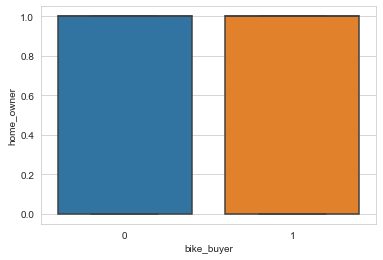

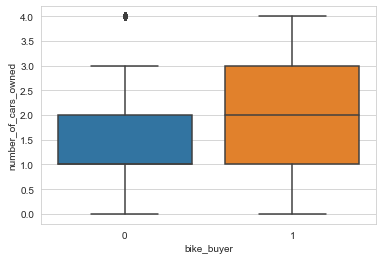

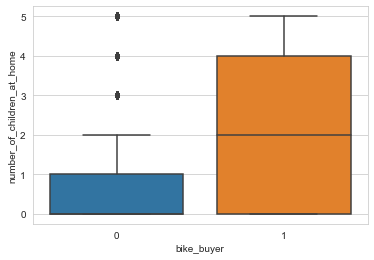

In [16]:
#Create a box plot for each of the variables compared to bike_buyer
def plot_box(dataset, cols, col_x = 'bike_buyer'):
    for col_y in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col_x, col_y, data=dataset)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cols = ['home_owner', 'number_of_cars_owned',
       'number_of_children_at_home']
plot_box(dataset, cols)


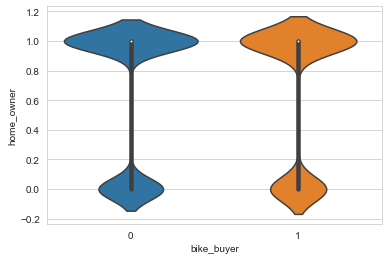

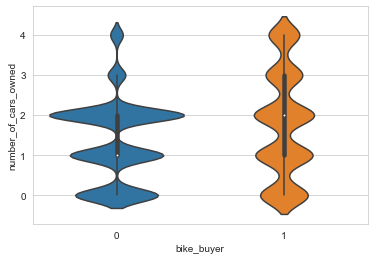

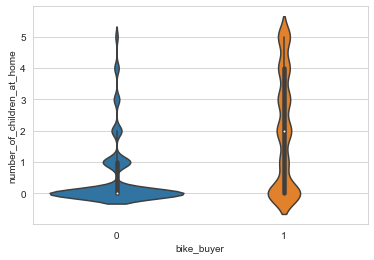

In [17]:
#Create a violin plot for each of the variables compared to bike_buyer
def plot_violin(dataset, cols, col_x = 'bike_buyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=dataset)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(dataset, cols)

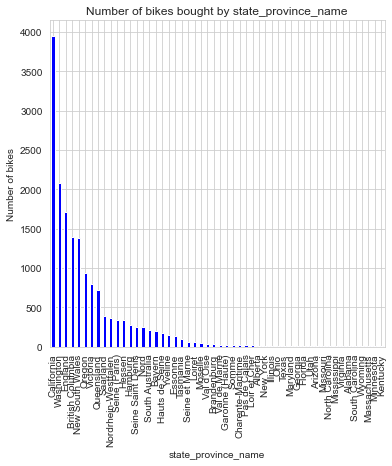

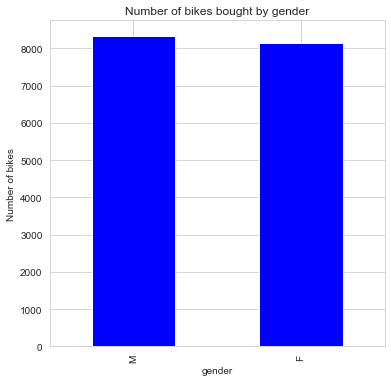

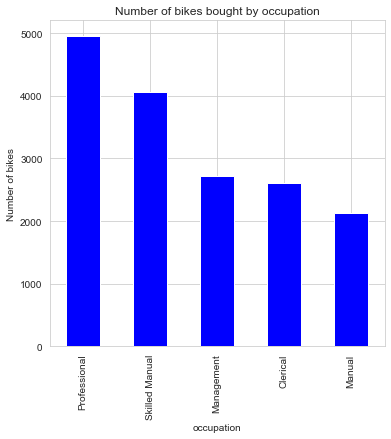

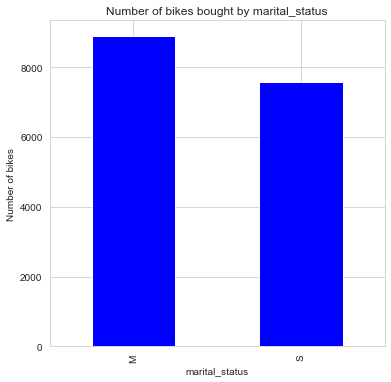

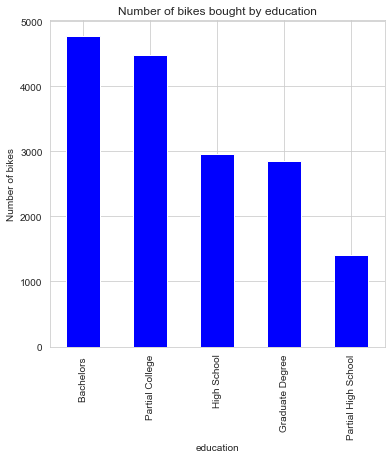

In [18]:
#Create a bar plot for each of the variables compared to bike_buyer
def plot_bars(dataset, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = dataset[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of bikes bought by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of bikes')# Set text for y axis
        plt.show()

plot_cols = ['state_province_name', 'gender', 'occupation', 
             'marital_status', 'education']
plot_bars(dataset, plot_cols) 

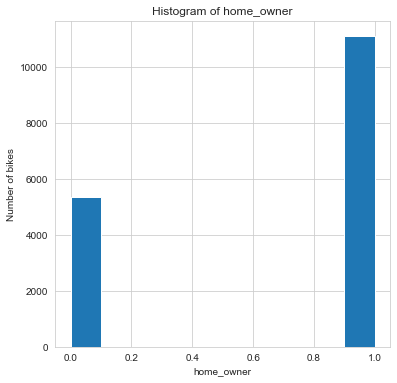

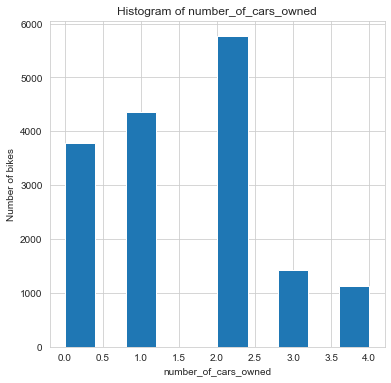

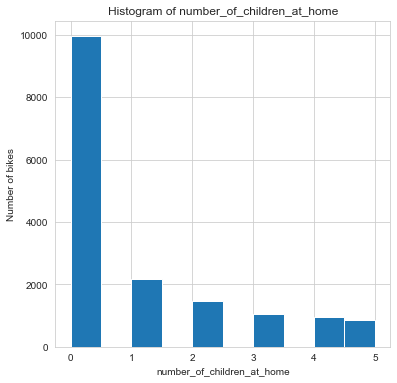

In [19]:
#Create a histogram for each of the variables compared to bike_buyer
def plot_histogram(dataset, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        dataset[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of bikes')# Set text for y axis
        plt.show()

plot_histogram(dataset, cols)

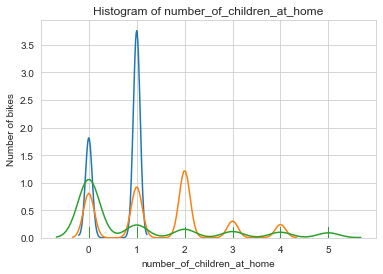

In [20]:
#Create a density histogram for each of the variables compared to bike_buyer
def plot_density_hist(dataset, cols, bins=10, hist=False):
    for col in cols:
        sns.set_style('whitegrid')
        sns.distplot(dataset[col], bins = bins, rug=True, hist=hist)
        plt.title('Histogram of ' + col)
        plt.xlabel(col)
        plt.ylabel('Number of bikes')
        plt.show
plot_density_hist(dataset, cols)

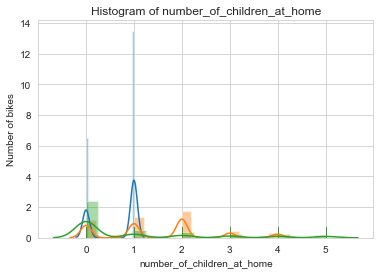

In [21]:
plot_density_hist(dataset, cols, bins = 20, hist = True)

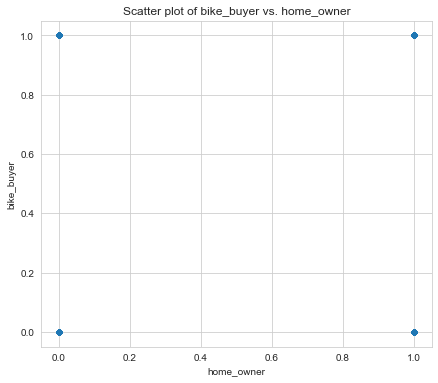

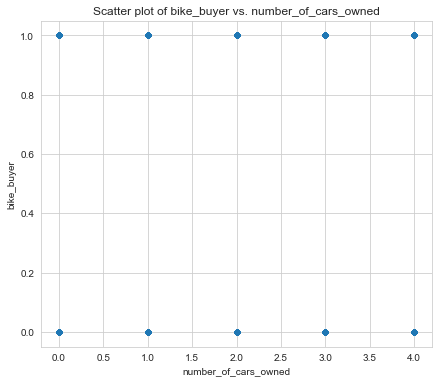

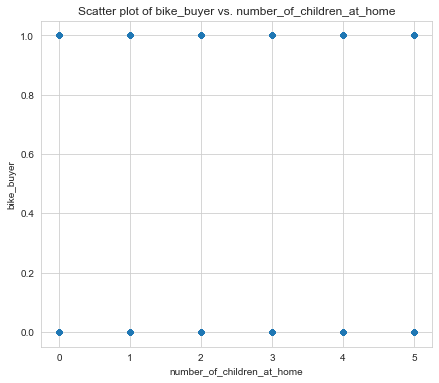

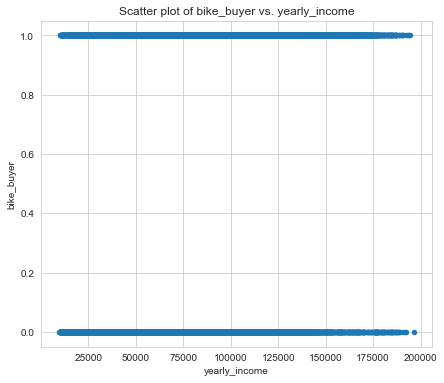

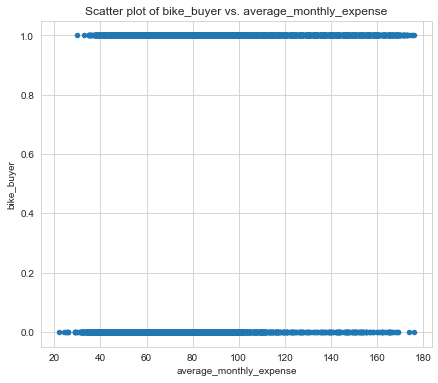

In [22]:
#Create a scatter plot for each of the variables compared to bike_buyer
def plot_scatter(dataset, cols, col_y = 'bike_buyer'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        dataset.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
cols = ['home_owner', 'number_of_cars_owned',
       'number_of_children_at_home', 'yearly_income', 
       'average_monthly_expense']
plot_scatter(dataset, cols)        

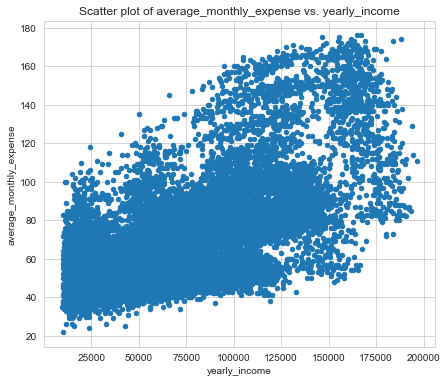

In [23]:
plot_scatter(dataset, ['yearly_income'], 'average_monthly_expense')

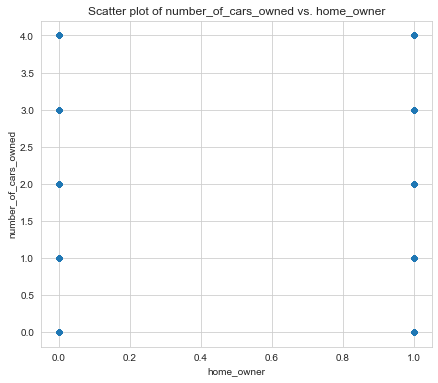

In [24]:
plot_scatter(dataset, ['home_owner'], 'number_of_cars_owned')

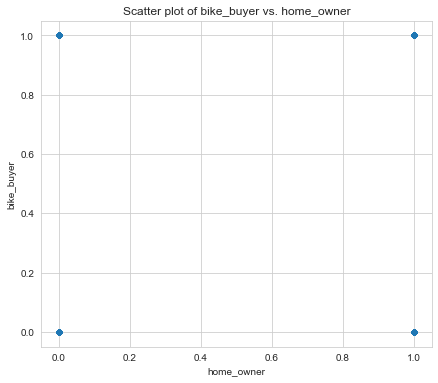

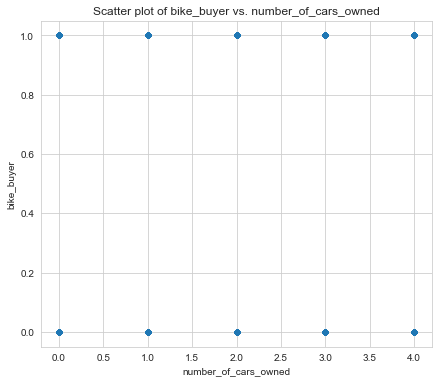

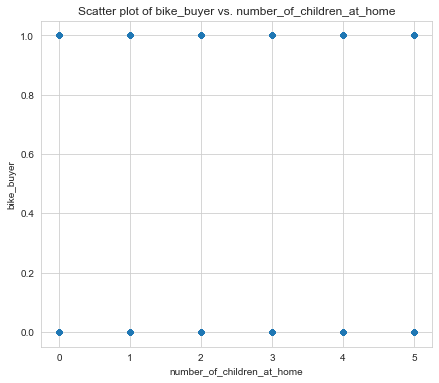

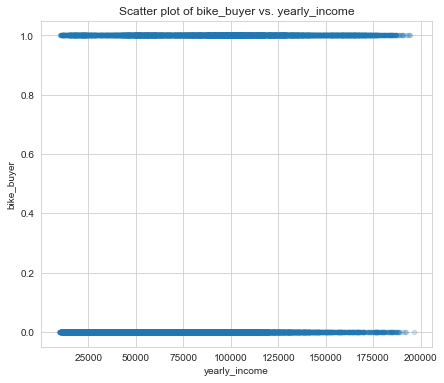

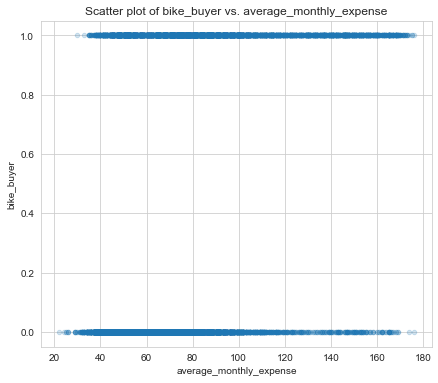

In [25]:
#increase the transparency of the dots to understand 
#where the data clusters better
def plot_scatter_t(dataset, cols, col_y = 'bike_buyer', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        dataset.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_scatter_t(dataset, cols, alpha = 0.2)

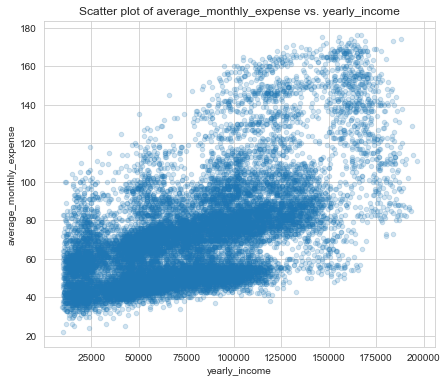

In [26]:
plot_scatter_t(dataset, ['yearly_income'], 'average_monthly_expense', alpha = 0.2)

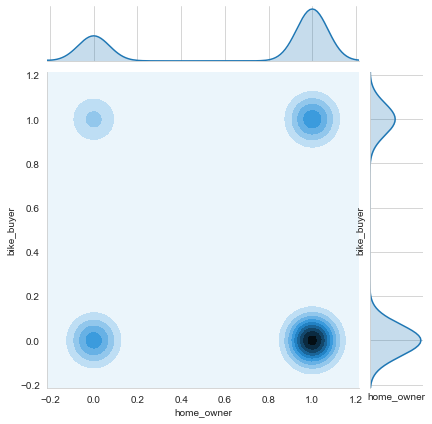

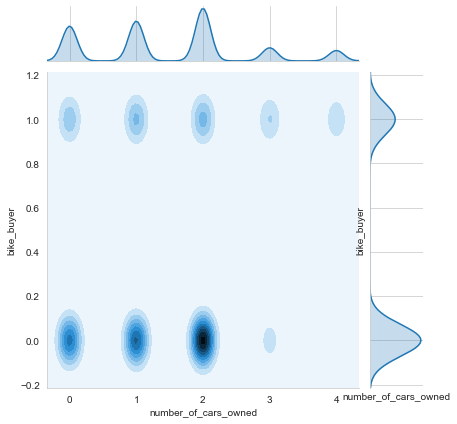

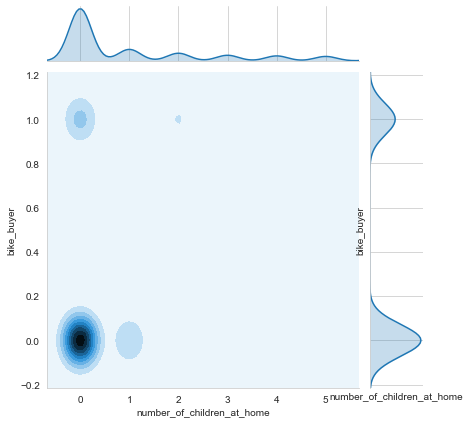

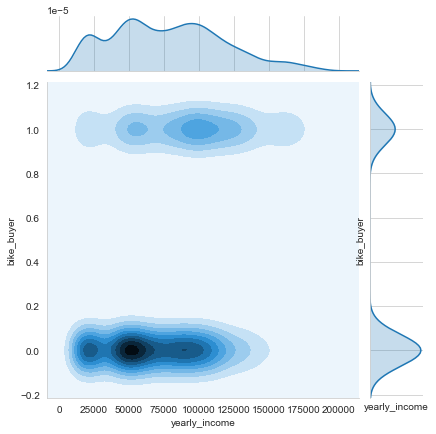

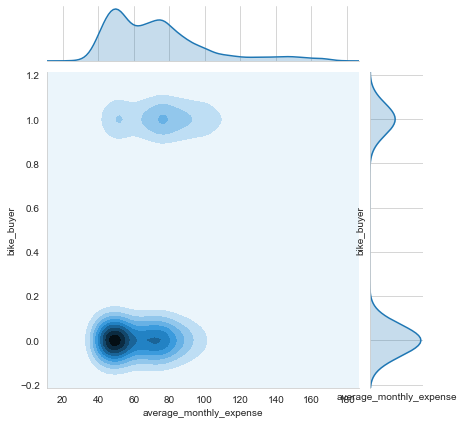

In [27]:
def plot_desity_2d(auto_prices, cols, col_y = 'bike_buyer', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=dataset, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(dataset, cols)    

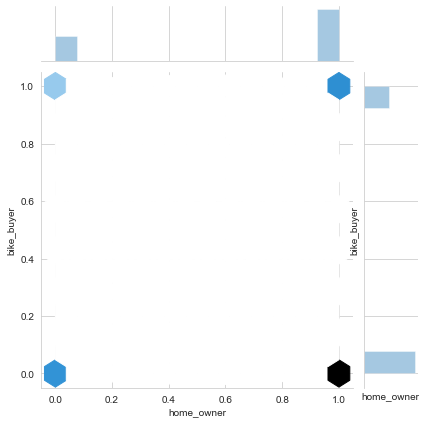

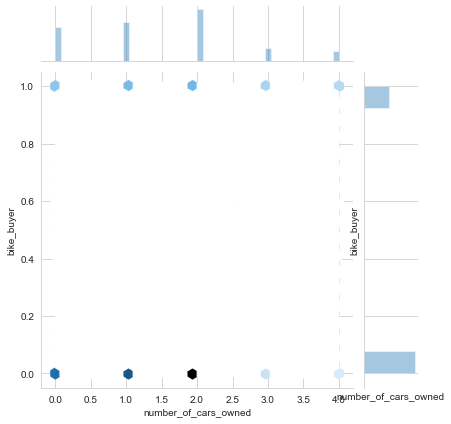

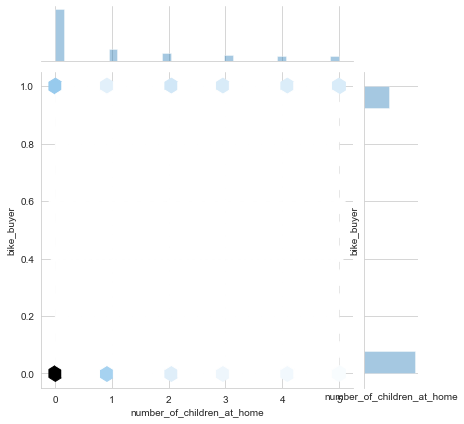

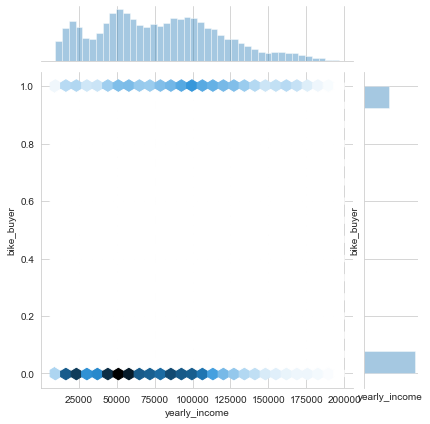

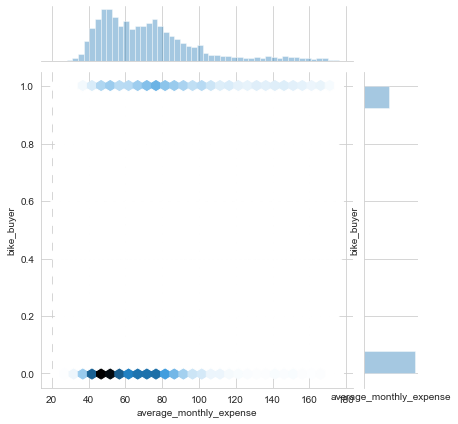

In [28]:
plot_desity_2d(dataset, cols, kind = 'hex')   

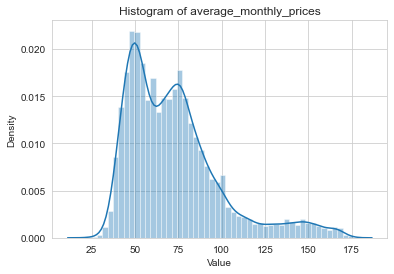

In [29]:
def hist_plot(vals, lab):
    #Distribution pllot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
hist_plot(dataset['average_monthly_expense'], 'average_monthly_prices')

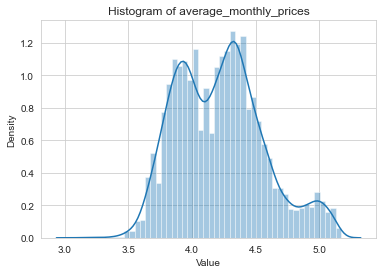

In [64]:
#Apply the logarithmic function to make the normal curve symmetrical
dataset['average_monthly_expense'] = np.log(dataset['average_monthly_expense'])
hist_plot(dataset['average_monthly_expense'], 'average_monthly_prices')

In [67]:
#save the changes made by creating a new dataset
dataset.to_csv('final dataset', header = True, index = False)